#### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
- 데이터 셋 :  임의로 생성
- 피쳐/속성 : 공부시간, 과외횟수
- 라벨/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터 분포가 선형 분포여야함!
- 규칙/패턴 : 공부시간과 과외 횟수에 점수 결정 

In [29]:
# 다중 선형 회귀
# 점수 = 공부시간*가중치 + 과외횟수*가중치 + 절편
# y= ax + bx + c


##### 1. 데이터 준비

In [30]:
# 임의의 데이터
hour = [1,3,4,5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,2,1,2,0,1]

In [31]:
import matplotlib.pyplot as plt

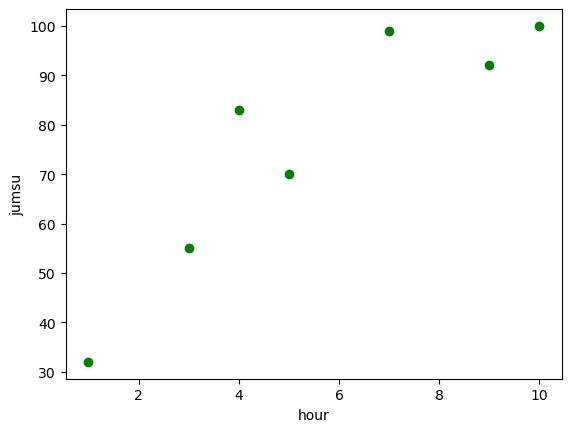

In [32]:
plt.plot(hour, jumsu, 'go')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.show()

In [33]:
# DF 및 시리즈 제작 >> 학습용 데이터 셋 구성 => 피쳐와 타겟
import pandas as pd
dataDF = pd.DataFrame({'hour':hour, "Lesson":lesson})
jumsuSR = pd.Series(jumsu)

##### 2. 모델 생성 및 학습 진행

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np
np.set_printoptions(suppress=True) # np 상수값 표현 없애는 모듈 사용

In [35]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [36]:
# 학습 진행 >> 진행 이후 coef_, intercept_ 가능
model.fit(dataDF,jumsuSR)

LinearRegression()

In [37]:
# 학습 후 모델 파라미터 > 피쳐가 2개 >>> coef_ = 2개 >>>>>>>>>>>>>>>>>>>>>>?????????? 그럼 기울기가 2개인건가? 레슨이랑 시간 각각 나누어져서??
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 2개, [ 6.27924892 11.61819933]
model.intercept_ : 30.914299470390006


##### 3. 모델성능 평가

In [38]:
### 모듈 로딩>> 손실/비용함수로 오차, 결정계수 (회귀)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
# 점수 ==> 내부에서 predict()진행 ==> 결과로 R2 계수 추출해서 반환
scroe = model.score(dataDF,jumsuSR)
print(f'score : {scroe}')

score : 0.9649627963178466


In [40]:
# 성능 지표 >> 오차계산과 결정계수 계산
pre_jumsu = model.predict(dataDF)

In [41]:
# 손실/비율 계산 함수 ==> 정답과 예측값 : 0에 가까울 수록 좋음
mse = mean_squared_error(jumsuSR, pre_jumsu)
rmse = mean_squared_error(jumsuSR, pre_jumsu, squared=False)
mea = mean_absolute_error(jumsuSR, pre_jumsu) 

# 얼마나 장답에 가깝게 값을 예측 했느냐를 나타내는 지표
# ==> 정답과 예측값을 제공: 1에 가까울수록 좋음
r2 = r2_score(jumsuSR, pre_jumsu)

In [42]:
# 손실 > 비용함수 값은 0에 가까울 수록
# 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}') # 비용/손실 함수
print(f'rmse : {rmse}') # 비용/손실 함수
print(f'mea : {mea}') # 비용/손실 함수
print(f'r2 : {r2}') # 결제계수

mse : 19.134603480294373
rmse : 4.374311772187069
mea : 4.127794208680101
r2 : 0.9649627963178466
